## Flight Price Prediction

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

* Time of purchase patterns (making sure last-minute purchases are expensive)
* Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

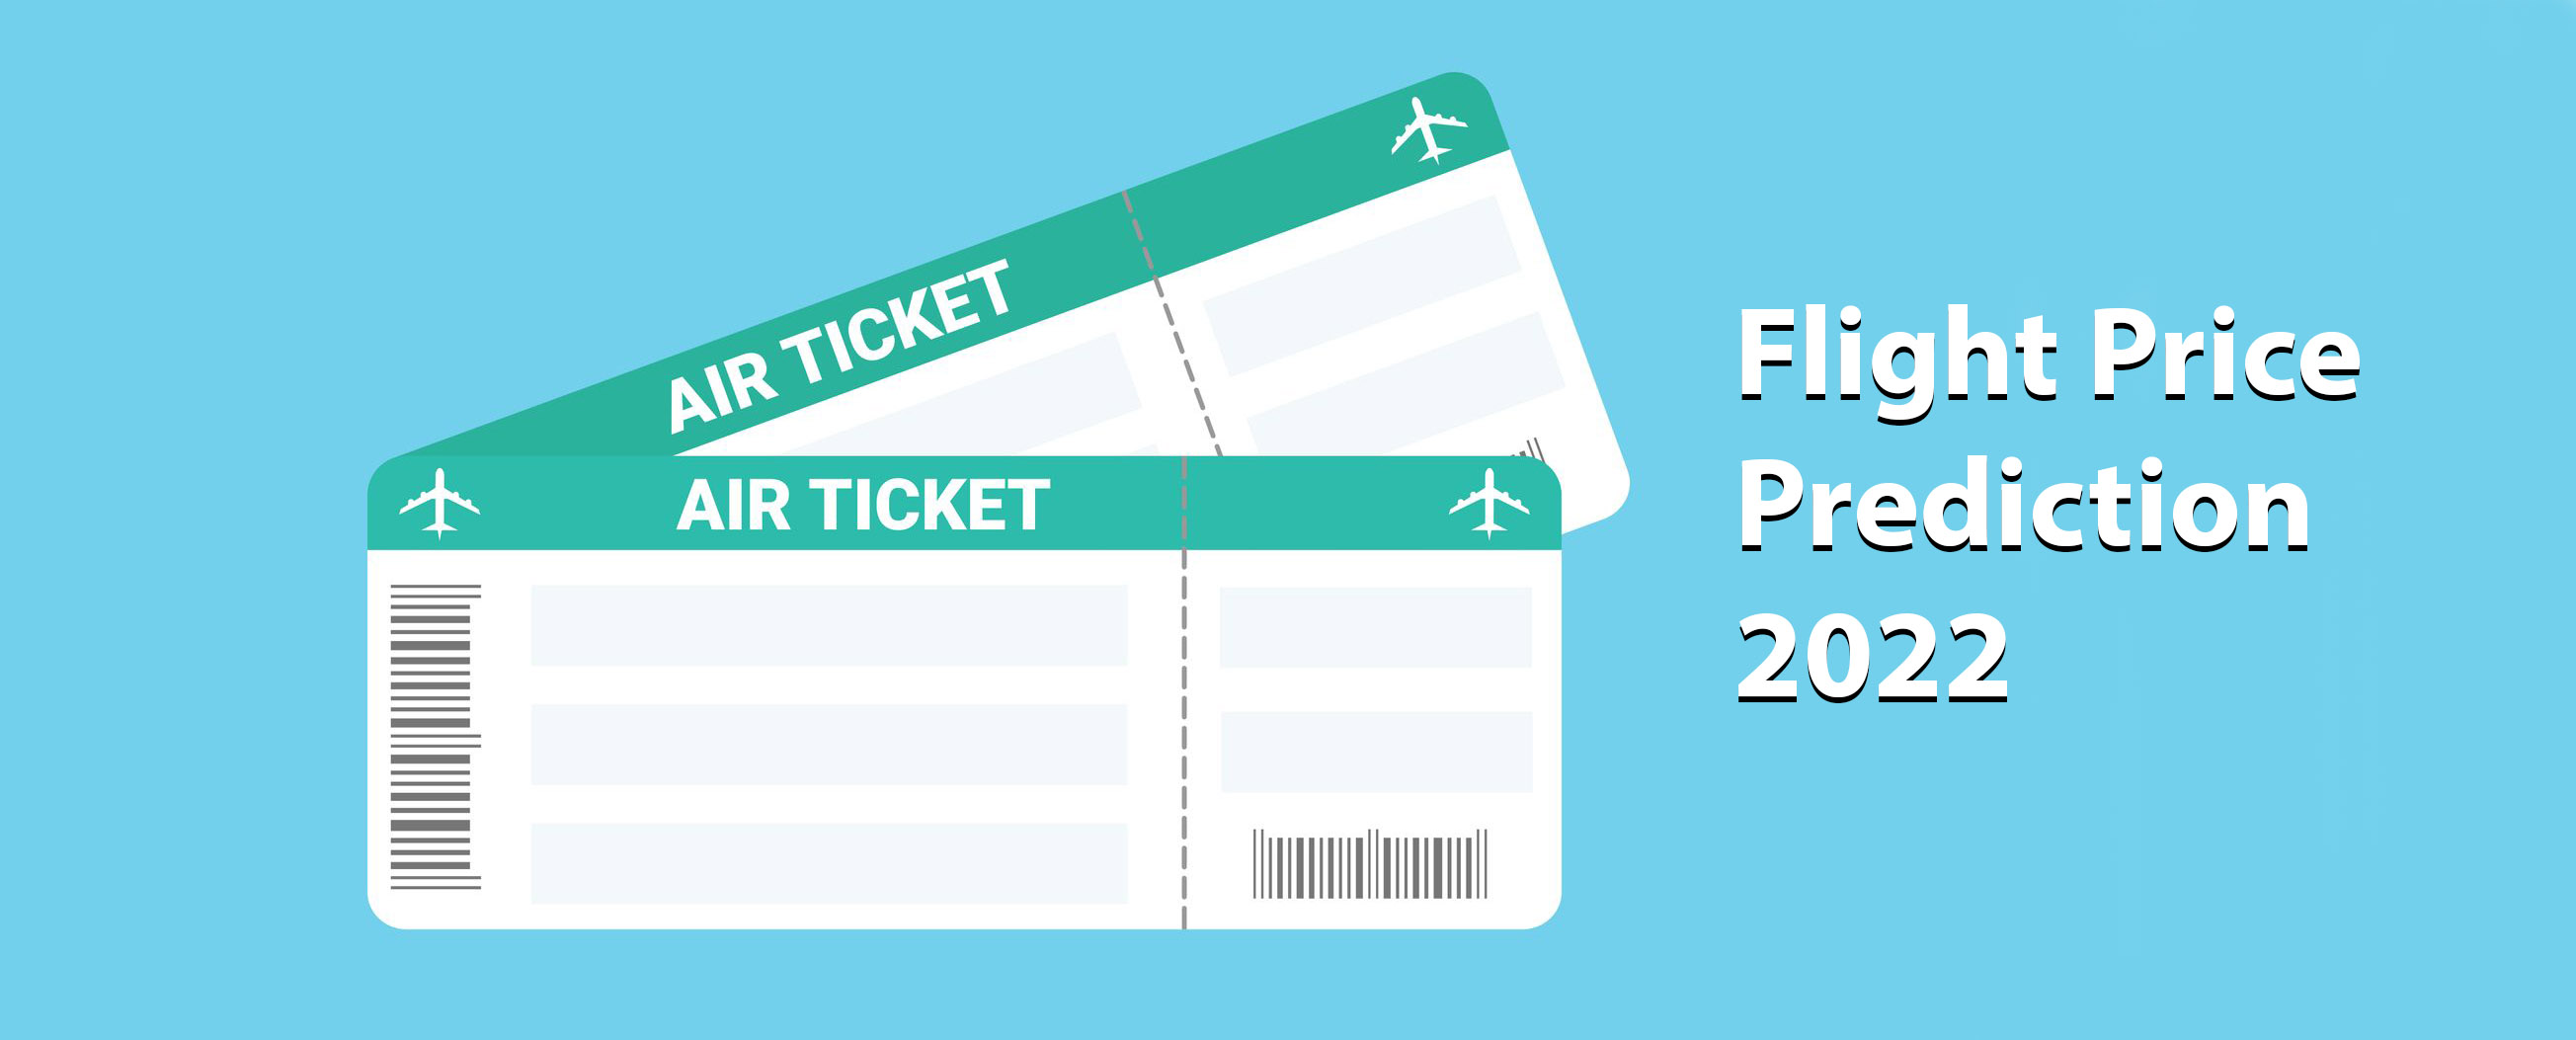

## Data Analysis

After cleaning the data, you have to do some analysis on the data.

* Do airfares change frequently?
* Do they move in small increments or in large jumps?
* Do they tend to go up or down over time?
* What is the best time to buy so that the consumer can save the most by taking the least risk?
* Does price increase as we get near to departure date?
* Is Indigo cheaper than Jet Airways?
* Are morning flights expensive?

## Model Building

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps below:

* Data Cleaning
* Exploratory Data Analysis
* Data Pre-processing
* Model Building
* Model Evaluation
* Selecting the best model

In [270]:
# Importing required libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

In [271]:
# importing dataset
df = pd.read_csv(r'..//Web Scraping/makeMyTrip.csv', index_col=0)

In [272]:
#open dataset
df.head()

Airline_Names Departure_time Arrival_time Flight_Duration Source_Place  \
0      Go First          02:00        04:15       02 h 15 m    New Delhi   
1      Go First          08:00        10:10       02 h 10 m    New Delhi   
2      Go First          10:30        12:50       02 h 20 m    New Delhi   
3      Go First          12:45        15:00       02 h 15 m    New Delhi   
4      Go First          14:20        16:35       02 h 15 m    New Delhi   

  Destination_Place Number_Of_Stops Flight_Prices  
0            Mumbai        Non stop         5,954  
1            Mumbai        Non stop         5,954  
2            Mumbai        Non stop         5,954  
3            Mumbai        Non stop         5,954  
4            Mumbai        Non stop         5,954

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1829 entries, 0 to 1828
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline_Names      1087 non-null   object
 1   Departure_time     1087 non-null   object
 2   Arrival_time       1087 non-null   object
 3   Flight_Duration    1087 non-null   object
 4   Source_Place       1087 non-null   object
 5   Destination_Place  1087 non-null   object
 6   Number_Of_Stops    1087 non-null   object
 7   Flight_Prices      1087 non-null   object
dtypes: object(8)
memory usage: 128.6+ KB


We're looking at the first five and last five rows of our dataset. It reveals that our dataframe contains a total of 1829 rows and 8 columns. Our dataset comprises a target label "Flight Prices" column, and the remaining feature columns may be utilised to calculate or assist in forecasting the price of flights for various locations, as seen in the above cell. Because price is a constant value, this is a regression problem!

## EDA

In [274]:
df.sample(5)

Airline_Names Departure_time Arrival_time Flight_Duration  \
1270      Go First          06:00        08:10       02 h 10 m   
669            NaN            NaN          NaN             NaN   
887      Air India          20:15        00:05       27 h 50 m   
1526        IndiGo          06:05        10:25       04 h 20 m   
557       Spicejet          07:50        09:10       01 h 20 m   

            Source_Place Destination_Place  \
1270              Mumbai         New Delhi   
669                  NaN               NaN   
887   Thiruvananthapuram           Kolkata   
1526              Mumbai         New Delhi   
557              Chennai         Bengaluru   

                         Number_Of_Stops Flight_Prices  
1270                            Non stop         5,942  
669                                  NaN           NaN  
887   3 stop via Mumbai,Indore,New Delhi        17,529  
1526                  1 stop via Udaipur         5,942  
557                             Non stop         3,361

#### Column Description:

* Airline_Names : This shows the list of all the Airline Names for which the data got scraped
* Departure_time : In this column we have the timings of every flight departure
* Arrival_time : Here in this column we have the timings of every flight arrival
* Flight_Duration : We can see the total duration of a flight that it took to fly from the source to the destination
* Source_Place : Gives us the name of the source place where the flight journey began
* Destination_Place : Shows us the name of the destination place where the flight journey ended
* Number_Of_Stops : Lists the number of stops the flight is going to take to complete the entire journey
* Flight_Prices : Finally we have our label column that has the ticket prices for the aircraft journey

In [275]:
#checking for null values
df.isna().sum()

Airline_Names        742
Departure_time       742
Arrival_time         742
Flight_Duration      742
Source_Place         742
Destination_Place    742
Number_Of_Stops      742
Flight_Prices        742
dtype: int64

<AxesSubplot:>

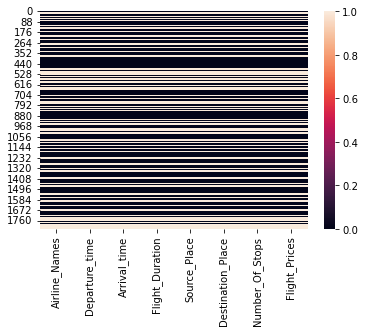

In [276]:
sns.heatmap(df.isna())

In [277]:
#droping null values
df= df.dropna()

<AxesSubplot:>

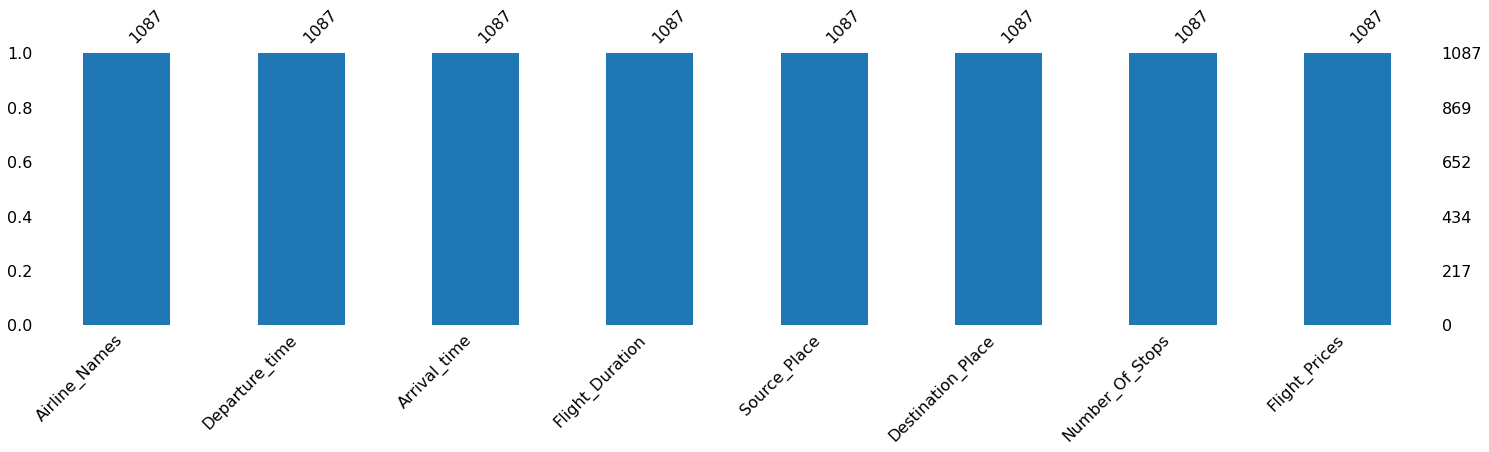

In [278]:
missingno.bar(df, figsize = (25,5), color="tab:blue")

In [279]:
print("Missing column values in percentage:")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 6)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Airline_Names : 0.0 %
Departure_time : 0.0 %
Arrival_time : 0.0 %
Flight_Duration : 0.0 %
Source_Place : 0.0 %
Destination_Place : 0.0 %
Number_Of_Stops : 0.0 %
Flight_Prices : 0.0 %


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1818
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline_Names      1087 non-null   object
 1   Departure_time     1087 non-null   object
 2   Arrival_time       1087 non-null   object
 3   Flight_Duration    1087 non-null   object
 4   Source_Place       1087 non-null   object
 5   Destination_Place  1087 non-null   object
 6   Number_Of_Stops    1087 non-null   object
 7   Flight_Prices      1087 non-null   object
dtypes: object(8)
memory usage: 76.4+ KB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all 8 columns showing as object datatype therefore some data cleaning is required to fix those details.

In [281]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Destination_Place              7
Airline_Names                  8
Source_Place                   8
Number_Of_Stops               48
Flight_Prices                102
Flight_Duration              116
Departure_time               152
Arrival_time                 171

With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns of our dataset.

In [282]:
value = ["Destination_Place", "Airline_Names", "Source_Place", "Number_Of_Stops"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Destination_Place
New Delhi    276
Mumbai       234
Pune         164
Kolkata      150
Bengaluru    132
Hyderabad     95
Indore        36
Name: Destination_Place, dtype: int64
Airline_Names
IndiGo              405
Go First            222
Vistara             192
Air India           159
Spicejet             75
AirAsia              28
Star Air              4
IndiGo, Spicejet      2
Name: Airline_Names, dtype: int64
Source_Place
New Delhi             270
Mumbai                233
Bengaluru             183
Hyderabad             155
Pune                  100
Thiruvananthapuram     71
Indore                 43
Chennai                32
Name: Source_Place, dtype: int64
Number_Of_Stops
Non stop                                         762
1 stop via New Delhi                              59
1 stop via Bengaluru                              50
1 stop via Hyderabad                              20
1 stop via Mumbai                                 19
1 stop via Ahmedabad                              

I have listed the unique value information for the columns "Destination_Place", "Airline_Names", "Source_Place", "Number_Of_Stops" to see the unique values in the columns. This also shows that atleast in these columns we do not have to worry about any junk data being present.

## Data Preprocessing

In [283]:
# Number_Of_Stops

df.Number_Of_Stops.replace({
    "Non stop": 0, 
    "1 stop via New Delhi": 1,
    "1 stop via Hyderabad": 1,
    "1 stop via Bengaluru": 1,
    "1 stop via Mumbai":1,
    "1 stop via Ahmedabad":1,
    "1 stop via Goa":1,
    "1 stop via Chennai":1,
    "1 stop via Indore":1,
    "1 stop via Udaipur":1,
    "1 stop via Visakhapatnam":1,
    "1 stop via Jharsuguda":1,
    "1 stop via Jodhpur":1,
    "1 stop via Kochi":1,
    "1 stop via Jaipur":1,
    "1 stop via Vijayawada":1,
    "1 stop via Lucknow":1,
    "1 stop via Tirupati":1,
    "1 stop via Kolhapur":1,
    "1 stop via Kolkata":1,
    "1 stop via Aurangabad":1,
    "1 stop via Patna":1,
    "1 stop via Mysore":1,
    "1 stop via Jamnagar":1,
    "1 stop via Chandigarh":1,
    "1 stop via Raipur":1,
    "1 stop via Bhubaneswar":1,
    "1 stop via Varanasi":1,
    "1 stop via Bhopal":1,
    "1 stop via Dehradun":1,
    "1 stop via Jabalpur":1,
    
    "2 stop via New Delhi,Mumbai": 2,
    "2 stop via New Delhi,Guwahati": 2,
    "2 stop via New Delhi,Lucknow": 2,
    "2 stop via New Delhi,Hyderabad": 2,
    "2 stop via Mumbai,Hyderabad":2,
    "2 stop via Mumbai,Patna": 2,
    "2 stop via Mumbai,Goa": 2,
    "2 stop via Mumbai,Nagpur": 2,
    "2 stop via Mumbai,New Delhi": 2,
    "2 stop via Bengaluru,Chennai": 2,
    
    "3 stop via New Delhi,Raipur,Jharsuguda": 3,
    "3 stop via New Delhi,Surat,Bhubaneswar": 3,
    "3 stop via Mumbai,Indore,New Delhi": 3,
    "3 stop via Mumbai,Raipur,Jharsuguda": 3,
    "3 stop via New Delhi,Hyderabad,Kolhapur": 3,
    
    "4 stop via New Delhi,Surat,Bhubaneswar,Ranchi": 4,
    "4 stop via New Delhi,Nagpur,Raipur,Jharsuguda": 4,}, inplace = True)



df["Number_Of_Stops"]= df["Number_Of_Stops"].astype(int)
df["Number_Of_Stops"].value_counts()

0    762
1    275
2     41
3      7
4      2
Name: Number_Of_Stops, dtype: int64

Now we are changing the object datatype "Number_Of_Stops" column to integer values by giving them the numeric stops values instead of a descriptive one.

In [284]:
df

Airline_Names Departure_time Arrival_time Flight_Duration Source_Place  \
0         Go First          02:00        04:15       02 h 15 m    New Delhi   
1         Go First          08:00        10:10       02 h 10 m    New Delhi   
2         Go First          10:30        12:50       02 h 20 m    New Delhi   
3         Go First          12:45        15:00       02 h 15 m    New Delhi   
4         Go First          14:20        16:35       02 h 15 m    New Delhi   
...            ...            ...          ...             ...          ...   
1814     Air India          14:45        15:55       01 h 10 m    New Delhi   
1815        IndiGo          18:00        19:20       01 h 20 m    New Delhi   
1816       Vistara          05:55        07:30       01 h 35 m    New Delhi   
1817       Vistara          18:30        19:55       01 h 25 m    New Delhi   
1818        IndiGo          09:35        18:40       09 h 05 m    New Delhi   

     Destination_Place  Number_Of_Stops Flight_Prices  
0               Mumbai                0         5,954  
1               Mumbai                0         5,954  
2               Mumbai                0         5,954  
3               Mumbai                0         5,954  
4               Mumbai                0         5,954  
...                ...              ...           ...  
1814            Indore                0         5,115  
1815            Indore                0         5,115  
1816            Indore                0         5,116  
1817            Indore                0         5,116  
1818            Indore                1         5,168  

[1087 rows x 8 columns]

In [285]:
# Departure_Time

df["Dep_Hour"] = pd.to_datetime(df.Departure_time, format="%H:%M").dt.hour
df["Dep_Min"] = pd.to_datetime(df.Departure_time, format="%H:%M").dt.minute
df["Departure_time"] = df['Dep_Hour'] + df['Dep_Min'] / 60
#df.drop(columns = ['Dep_Hour','Dep_Min'], inplace=True) 
df.head()

Airline_Names  Departure_time Arrival_time Flight_Duration Source_Place  \
0      Go First        2.000000        04:15       02 h 15 m    New Delhi   
1      Go First        8.000000        10:10       02 h 10 m    New Delhi   
2      Go First       10.500000        12:50       02 h 20 m    New Delhi   
3      Go First       12.750000        15:00       02 h 15 m    New Delhi   
4      Go First       14.333333        16:35       02 h 15 m    New Delhi   

  Destination_Place  Number_Of_Stops Flight_Prices  Dep_Hour  Dep_Min  
0            Mumbai                0         5,954         2        0  
1            Mumbai                0         5,954         8        0  
2            Mumbai                0         5,954        10       30  
3            Mumbai                0         5,954        12       45  
4            Mumbai                0         5,954        14       20

Now I am converting the object data type "Departure_time" column to float using the datetime functionality.

In [286]:
# Arrival_Time

df["Arr_Hour"] = pd.to_datetime(df.Arrival_time, format="%H:%M").dt.hour
df["Arr_Min"] = pd.to_datetime(df.Arrival_time, format="%H:%M").dt.minute
df["Arrival_time"] = df['Arr_Hour'] + df['Arr_Min'] / 60
#df.drop(columns = ['Arr_Hour','Arr_Min'], inplace=True)  
df.head()

Airline_Names  Departure_time  Arrival_time Flight_Duration Source_Place  \
0      Go First        2.000000      4.250000       02 h 15 m    New Delhi   
1      Go First        8.000000     10.166667       02 h 10 m    New Delhi   
2      Go First       10.500000     12.833333       02 h 20 m    New Delhi   
3      Go First       12.750000     15.000000       02 h 15 m    New Delhi   
4      Go First       14.333333     16.583333       02 h 15 m    New Delhi   

  Destination_Place  Number_Of_Stops Flight_Prices  Dep_Hour  Dep_Min  \
0            Mumbai                0         5,954         2        0   
1            Mumbai                0         5,954         8        0   
2            Mumbai                0         5,954        10       30   
3            Mumbai                0         5,954        12       45   
4            Mumbai                0         5,954        14       20   

   Arr_Hour  Arr_Min  
0         4       15  
1        10       10  
2        12       50  
3        15        0  
4        16       35

Here I am converting the object data type "Arrival_time" column to float using the datetime functionality.

In [287]:
# Assigning and converting Duration column into hours column seperate

Duration = list(df["Flight_Duration"])


Dur_hour = []

for i in range(len(Duration)):

    if len(Duration[i].split()) != 2:    # Check if duration contains only hour or mins

        if "h" in Duration[i]:

            Duration[i] = Duration[i].replace(' h ',' ')   # Adds 0 minute
            Duration[i] = Duration[i].replace(' m','')   # Adds 0 minute            
            Duration[i] = Duration[i].split(' ',1)[0]
            Dur_hour.append(float(Duration[i]))

        else:
            Duration[i] = "02" + Duration[i]           # Adds 0 hour
            Dur_hour.append(float(Duration[i]))

In [288]:
# Assigning and converting Duration column into minutes col seperate

Duration = list(df["Flight_Duration"])

Dur_min = []

for i in range(len(Duration)):

    if len(Duration[i].split()) != 2:    # Check if duration contains only hour or mins

        if "h" in Duration[i]:

            Duration[i] = Duration[i].replace(' h ',' ')   # Adds 0 minute
            Duration[i] = Duration[i].replace(' m','')   # Adds 0 minute            
            Duration[i] = Duration[i].split(' ',1)[1]
            Dur_min.append(float(Duration[i]))

        else:
            Duration[i] = "00" + Duration[i]           # Adds 0 hour
            Dur_min.append(float(Duration[i]))

In [289]:
FD_Hour = Dur_hour
FD_Min = Dur_min

In [290]:
len(FD_Hour),len(FD_Min)

(1049, 1049)

In [291]:
#df = pd.DataFrame(df)

#df['FD_Hour'] = FD_Hour
#df['FD_Min'] = FD_Min

#df

In [292]:
df = df.drop(['Flight_Duration'], axis = 1)
df

Airline_Names  Departure_time  Arrival_time Source_Place  \
0         Go First        2.000000      4.250000    New Delhi   
1         Go First        8.000000     10.166667    New Delhi   
2         Go First       10.500000     12.833333    New Delhi   
3         Go First       12.750000     15.000000    New Delhi   
4         Go First       14.333333     16.583333    New Delhi   
...            ...             ...           ...          ...   
1814     Air India       14.750000     15.916667    New Delhi   
1815        IndiGo       18.000000     19.333333    New Delhi   
1816       Vistara        5.916667      7.500000    New Delhi   
1817       Vistara       18.500000     19.916667    New Delhi   
1818        IndiGo        9.583333     18.666667    New Delhi   

     Destination_Place  Number_Of_Stops Flight_Prices  Dep_Hour  Dep_Min  \
0               Mumbai                0         5,954         2        0   
1               Mumbai                0         5,954         8        0   
2               Mumbai                0         5,954        10       30   
3               Mumbai                0         5,954        12       45   
4               Mumbai                0         5,954        14       20   
...                ...              ...           ...       ...      ...   
1814            Indore                0         5,115        14       45   
1815            Indore                0         5,115        18        0   
1816            Indore                0         5,116         5       55   
1817            Indore                0         5,116        18       30   
1818            Indore                1         5,168         9       35   

      Arr_Hour  Arr_Min  
0            4       15  
1           10       10  
2           12       50  
3           15        0  
4           16       35  
...        ...      ...  
1814        15       55  
1815        19       20  
1816         7       30  
1817        19       55  
1818        18       40  

[1087 rows x 11 columns]

In [293]:
df.head()

Airline_Names  Departure_time  Arrival_time Source_Place Destination_Place  \
0      Go First        2.000000      4.250000    New Delhi            Mumbai   
1      Go First        8.000000     10.166667    New Delhi            Mumbai   
2      Go First       10.500000     12.833333    New Delhi            Mumbai   
3      Go First       12.750000     15.000000    New Delhi            Mumbai   
4      Go First       14.333333     16.583333    New Delhi            Mumbai   

   Number_Of_Stops Flight_Prices  Dep_Hour  Dep_Min  Arr_Hour  Arr_Min  
0                0         5,954         2        0         4       15  
1                0         5,954         8        0        10       10  
2                0         5,954        10       30        12       50  
3                0         5,954        12       45        15        0  
4                0         5,954        14       20        16       35

Again I have used the datetime functionality to convert "Flight_Duration" column from object data type to float data type and removed the unwanted letters "h" and "m" from the values.

In [294]:
# Flight_Prices

df['Flight_Prices'] = df['Flight_Prices'].str.replace(',','')
df['Flight_Prices'] = df['Flight_Prices'].astype('float')
df

Airline_Names  Departure_time  Arrival_time Source_Place  \
0         Go First        2.000000      4.250000    New Delhi   
1         Go First        8.000000     10.166667    New Delhi   
2         Go First       10.500000     12.833333    New Delhi   
3         Go First       12.750000     15.000000    New Delhi   
4         Go First       14.333333     16.583333    New Delhi   
...            ...             ...           ...          ...   
1814     Air India       14.750000     15.916667    New Delhi   
1815        IndiGo       18.000000     19.333333    New Delhi   
1816       Vistara        5.916667      7.500000    New Delhi   
1817       Vistara       18.500000     19.916667    New Delhi   
1818        IndiGo        9.583333     18.666667    New Delhi   

     Destination_Place  Number_Of_Stops  Flight_Prices  Dep_Hour  Dep_Min  \
0               Mumbai                0         5954.0         2        0   
1               Mumbai                0         5954.0         8        0   
2               Mumbai                0         5954.0        10       30   
3               Mumbai                0         5954.0        12       45   
4               Mumbai                0         5954.0        14       20   
...                ...              ...            ...       ...      ...   
1814            Indore                0         5115.0        14       45   
1815            Indore                0         5115.0        18        0   
1816            Indore                0         5116.0         5       55   
1817            Indore                0         5116.0        18       30   
1818            Indore                1         5168.0         9       35   

      Arr_Hour  Arr_Min  
0            4       15  
1           10       10  
2           12       50  
3           15        0  
4           16       35  
...        ...      ...  
1814        15       55  
1815        19       20  
1816         7       30  
1817        19       55  
1818        18       40  

[1087 rows x 11 columns]

Finally I have removed the "," from the "Flight_Prices" column to ensure that the values are numeric and then converted them into float data type values.

In [295]:
df.dtypes

Airline_Names         object
Departure_time       float64
Arrival_time         float64
Source_Place          object
Destination_Place     object
Number_Of_Stops        int64
Flight_Prices        float64
Dep_Hour               int64
Dep_Min                int64
Arr_Hour               int64
Arr_Min                int64
dtype: object

In [296]:
df.describe(include="all").T

count unique        top freq         mean          std  \
Airline_Names        1087      8     IndiGo  405          NaN          NaN   
Departure_time     1087.0    NaN        NaN  NaN    13.565241     5.648488   
Arrival_time       1087.0    NaN        NaN  NaN    14.121435      6.32478   
Source_Place         1087      8  New Delhi  270          NaN          NaN   
Destination_Place    1087      7  New Delhi  276          NaN          NaN   
Number_Of_Stops    1087.0    NaN        NaN  NaN     0.355106     0.604563   
Flight_Prices      1087.0    NaN        NaN  NaN  6373.524379  2902.386154   
Dep_Hour           1087.0    NaN        NaN  NaN    13.163753     5.645028   
Dep_Min            1087.0    NaN        NaN  NaN    24.089236    17.748456   
Arr_Hour           1087.0    NaN        NaN  NaN    13.648574     6.305144   
Arr_Min            1087.0    NaN        NaN  NaN    28.371665    18.029489   

                        min       25%        50%        75%        max  
Airline_Names           NaN       NaN        NaN        NaN        NaN  
Departure_time     0.416667      8.75  13.416667  18.583333      23.75  
Arrival_time       0.083333  9.666667       14.5  19.583333  23.916667  
Source_Place            NaN       NaN        NaN        NaN        NaN  
Destination_Place       NaN       NaN        NaN        NaN        NaN  
Number_Of_Stops         0.0       0.0        0.0        1.0        4.0  
Flight_Prices        3361.0    5292.0     5943.0     5955.0    25719.0  
Dep_Hour                0.0       8.0       13.0       18.0       23.0  
Dep_Min                 0.0       5.0       20.0       40.0       55.0  
Arr_Hour                0.0       9.0       14.0       19.0       23.0  
Arr_Min                 0.0      10.0       30.0       45.0       55.0

Using the describe method I am taking a look at all the column value details and basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

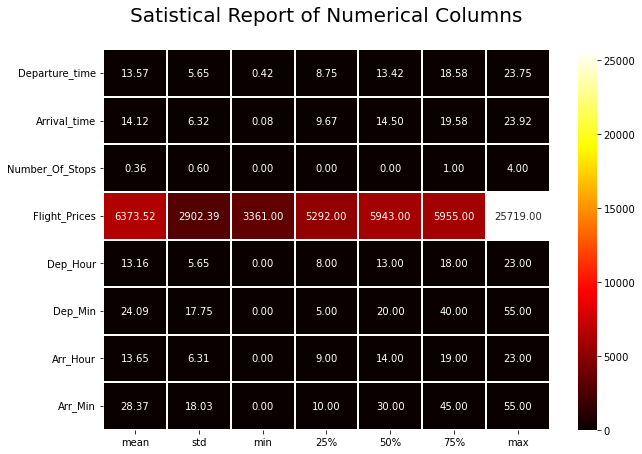

In [297]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n", fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In the visual representation we have taken into consideration only the numeric data part and can see that the only abnormality is present in our label column "Flight_Prices" which is higher than all the other values.

## Visualization

In [298]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

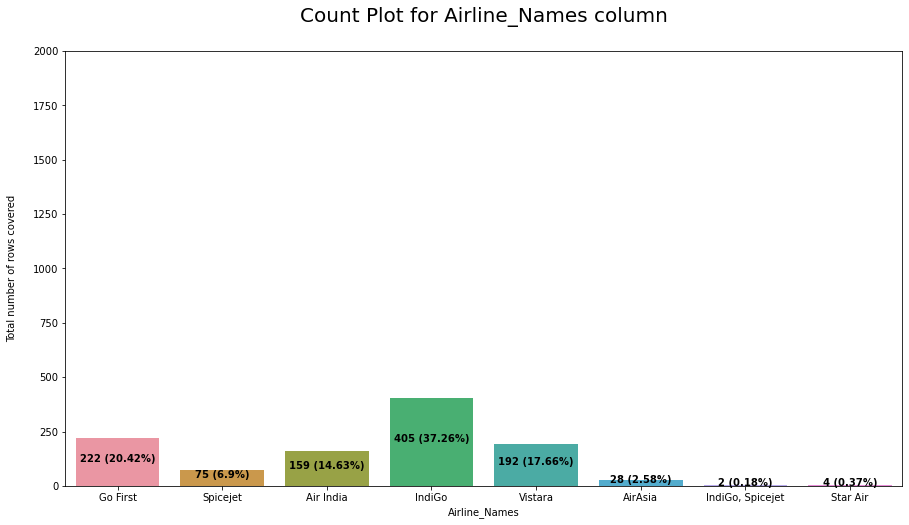

In [299]:
try:
    x = 'Airline_Names'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

* Highest number of airline preferred by people are Indigo covering 37.26% of the total record.
* We can see that Go First is quite close to the first one and a close competitor standing at the second position holding 20.42% of the total record.
* At third place we have Vistara airlines that covers 17.66% of total record in our airline data.
* Airlines Air India, Air Asia and SpiceJet are the least used by people covering 14.63%, 2.58%, 0.18% and 0.37% respectively.

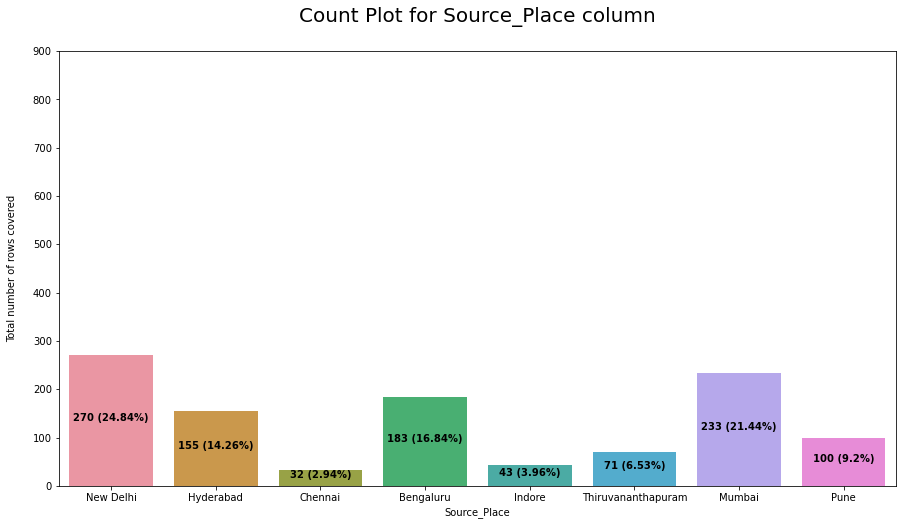

In [300]:
try:
    x = 'Source_Place'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

* The departure area or source place highly used or people majorly flying from the city is "New Delhi" covering 24.84% record in the column.
* We see that "Mumbai" is a close second wherein it covers 21.44% records in the column.
* Other two famous locations where people chose to fly from are "Bengaluru" and "Hyderabad" covering 16.84% and 14.26% respectively.
* The least travel from location is "Chennai" where I believe not many people chose to travel from unless they are returning from a vacation there and hence covers 2.94% of record in the column

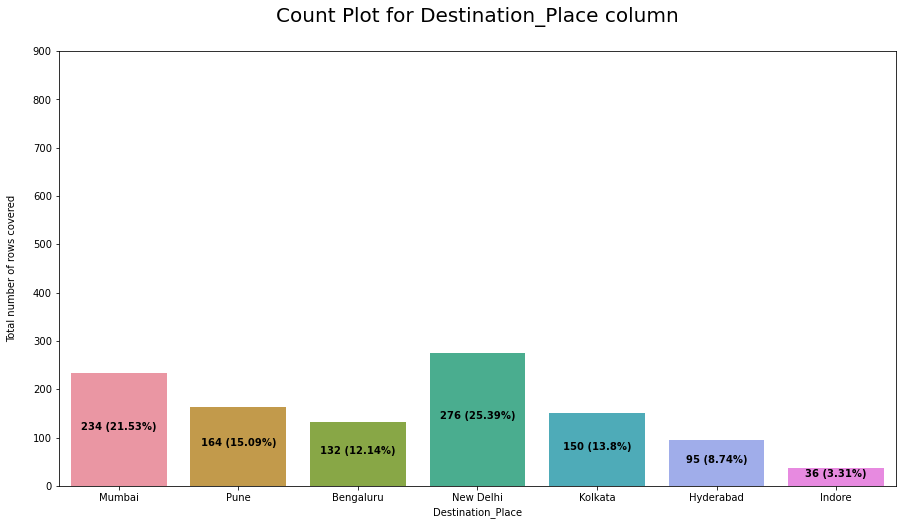

In [301]:
try:
    x = 'Destination_Place'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,900)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass


Observation:

* Just as in case of departure area even in terms of arrival area or destination place people prefer to fly towards the city "New Delhi" covering 25.39% of record.
* Again in a similar fashion "Mumbai" city is a close second destination that people like to fly towards covering 21.53% record in the column.
* Surprisingly we have "Pune" city taking the third place for destination that people pefer landing covering 15.09% of record.
* Finally similar to the departure location the least travel to area is "Indore" and it covers 3.31% record in the column.

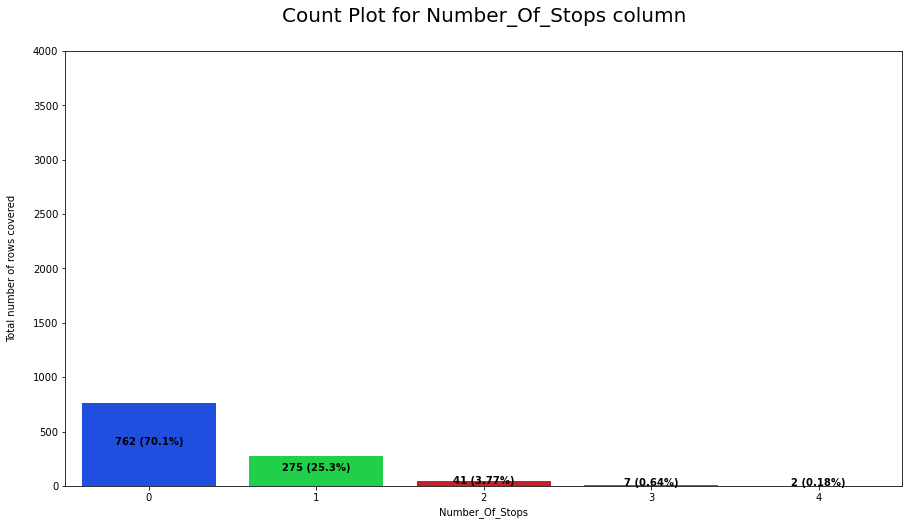

In [302]:
try:
    x = 'Number_Of_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,4000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:

* People generally buy flight tickets that have 0 stop layover covering 70.1% rows in the column.
* Next in line are 1 stop layovers which cover 25.3% rows.
* Here we can see that the 2 stop flights availability is around 3.77% of the total record.
* In domestic flight we rarely see 3 or 4 stop layovers and therefore they cover 0.64% and 0.18% of total rows in the column respectively.

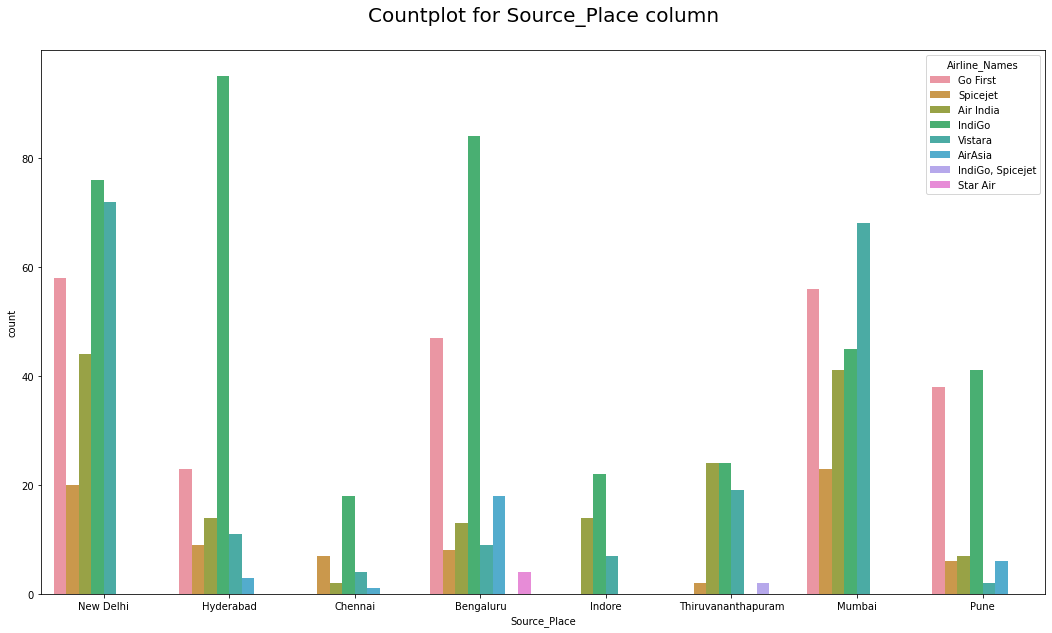

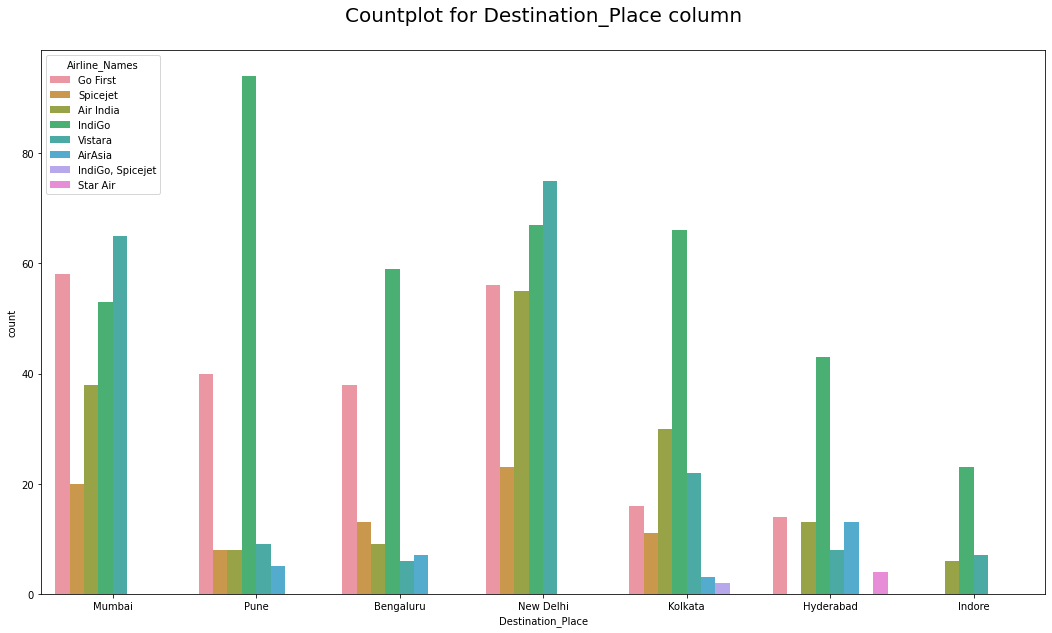

In [303]:
x = "Source_Place"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline_Names", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

Observation:

* Checking out the Source place details for each and every airline we can see that Hyderabad city has the highest number of departure flights for Indigo airlines.
* Indigo, Vistara and Air India are the airlines that are used in almost all the cities to depart while the other airlines do not cover some or the other city.
* Looking at the Destination place details for each and every airline we can see that Pune city has the highest number of arrival flights for Indigo airlines.
* Once again we can observe that Go First, Spicejet, Indigo, Vistara and Air India are the leading airlines that are used in almost all cities to arrive while the other airlines miss out on some or the other regions.
* Overall I can notice that Air India, Vistara and Indigo flights do quite well and can be used for arrival and departure to and from any location in India.

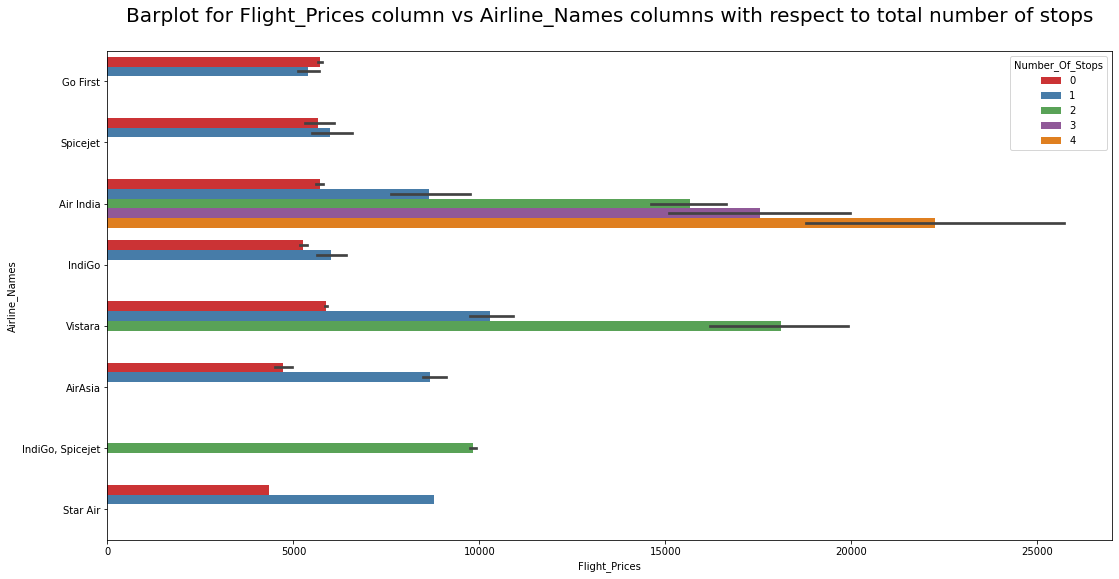

In [304]:
x = "Flight_Prices"
y = "Airline_Names"


plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Number_Of_Stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

Observation:

* If we see a trend the flights with 0 stops or rather direct flights for every airline is cheaper when compared to 1 or more layovers.
* Also flights with 2 and 3 stops have a considerably high price and number of flights available in those records are high too.
* Only Air India provides flights with 4 stop layover even in a domestic environment.
* SpiceJet, Go first, indigo, airindia, star air on the other hand only has flights available with 0 and 1 stop layovers.

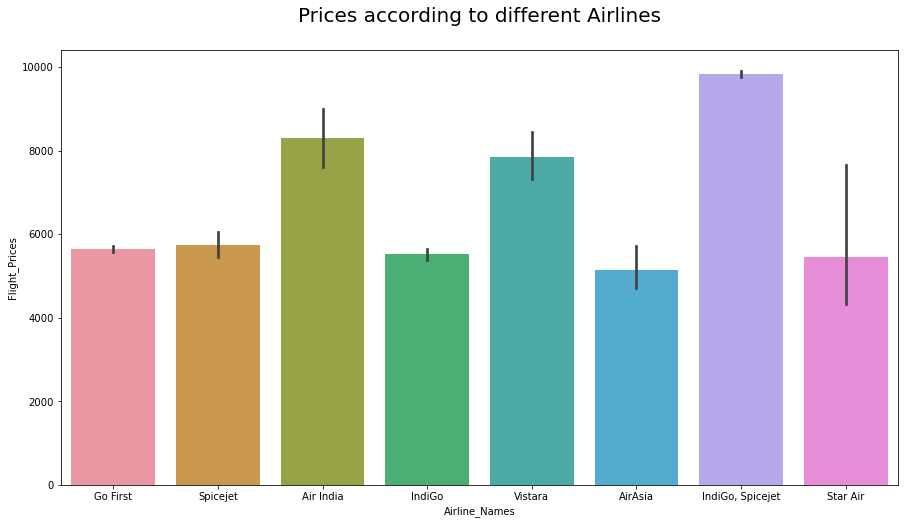

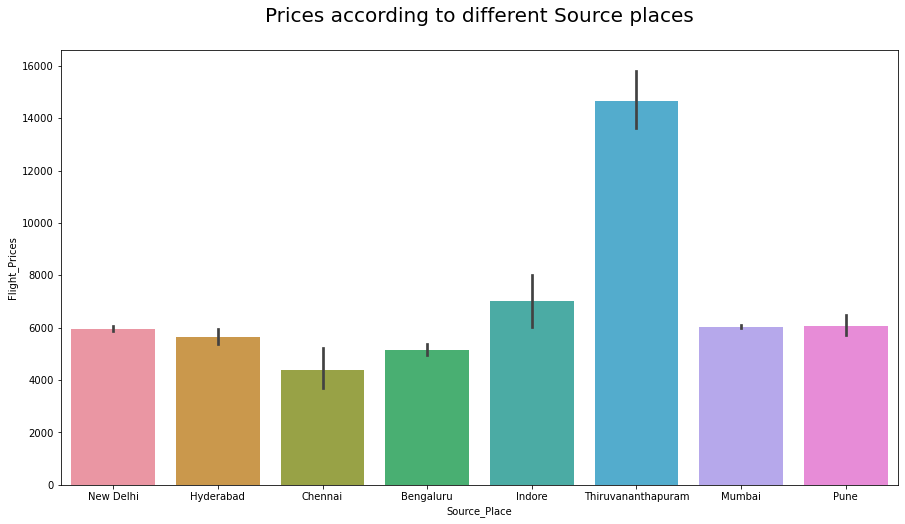

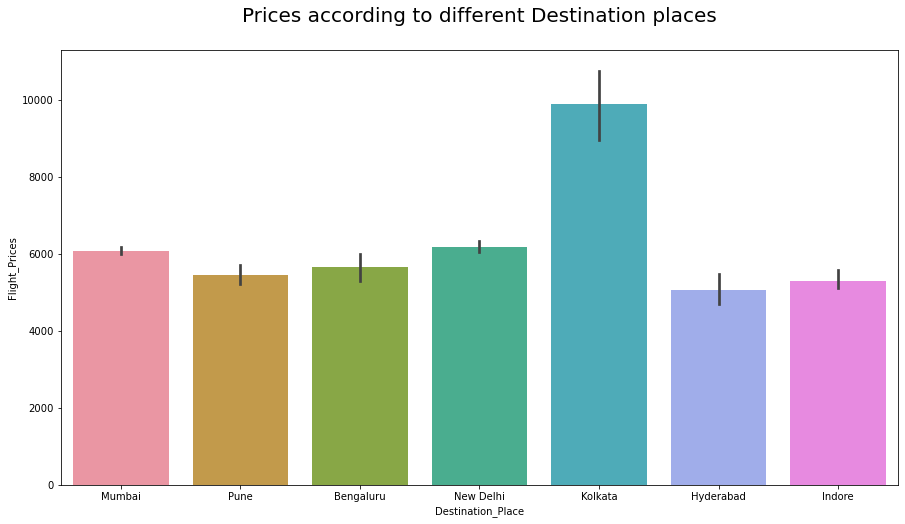

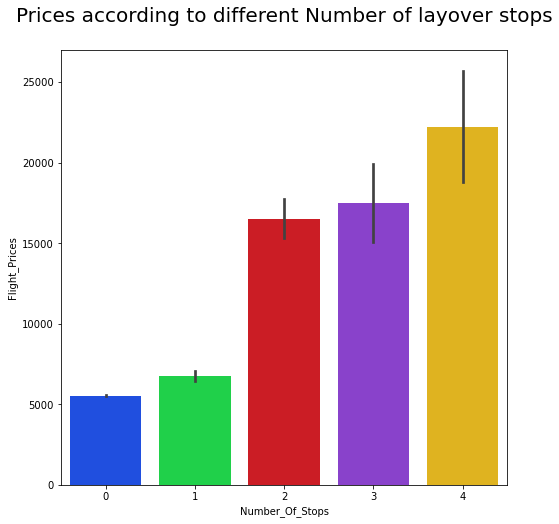

In [305]:
y = "Flight_Prices"

x = "Airline_Names"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination_Place"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Number_Of_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

Observation:

* Airfares in Indigo, spicejet & Air India are pretty high when compared to other airlines.
* Flight prices when departing from cities like Thiruvanathpuram and Indore have higher price range but the others are around the similar range a bit lesser in pricing but not providing a huge difference as such.
* Similarly prices when arriving from cities Mumbai and New delhi have high price range however the highest recorded is for Kolkota city and the rest fall in similar price bracket again not making any huge difference in savings.
* When we consider the layovers for pricing situtation then obviously direct flights are cheaper when compared to flights that have 1 or more stops.

## Encoding the categorical object datatype columns

In [306]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["Airline_Names", "Source_Place", "Destination_Place"]
df=ordinal_encode(df, column)
df

Airline_Names  Departure_time  Arrival_time  Source_Place  \
0               2.0        2.000000      4.250000           5.0   
1               2.0        8.000000     10.166667           5.0   
2               2.0       10.500000     12.833333           5.0   
3               2.0       12.750000     15.000000           5.0   
4               2.0       14.333333     16.583333           5.0   
...             ...             ...           ...           ...   
1814            0.0       14.750000     15.916667           5.0   
1815            3.0       18.000000     19.333333           5.0   
1816            7.0        5.916667      7.500000           5.0   
1817            7.0       18.500000     19.916667           5.0   
1818            3.0        9.583333     18.666667           5.0   

      Destination_Place  Number_Of_Stops  Flight_Prices  Dep_Hour  Dep_Min  \
0                   4.0                0         5954.0         2        0   
1                   4.0                0         5954.0         8        0   
2                   4.0                0         5954.0        10       30   
3                   4.0                0         5954.0        12       45   
4                   4.0                0         5954.0        14       20   
...                 ...              ...            ...       ...      ...   
1814                2.0                0         5115.0        14       45   
1815                2.0                0         5115.0        18        0   
1816                2.0                0         5116.0         5       55   
1817                2.0                0         5116.0        18       30   
1818                2.0                1         5168.0         9       35   

      Arr_Hour  Arr_Min  
0            4       15  
1           10       10  
2           12       50  
3           15        0  
4           16       35  
...        ...      ...  
1814        15       55  
1815        19       20  
1816         7       30  
1817        19       55  
1818        18       40  

[1087 rows x 11 columns]

I defined a function to apply OrdinalEncoder on my feature columns to convert the object datatype columns to numeric format.

In [307]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))
df

Shape of our data frame post encoding shows 1087 Rows and 11 columns



Airline_Names  Departure_time  Arrival_time  Source_Place  \
0               2.0        2.000000      4.250000           5.0   
1               2.0        8.000000     10.166667           5.0   
2               2.0       10.500000     12.833333           5.0   
3               2.0       12.750000     15.000000           5.0   
4               2.0       14.333333     16.583333           5.0   
...             ...             ...           ...           ...   
1814            0.0       14.750000     15.916667           5.0   
1815            3.0       18.000000     19.333333           5.0   
1816            7.0        5.916667      7.500000           5.0   
1817            7.0       18.500000     19.916667           5.0   
1818            3.0        9.583333     18.666667           5.0   

      Destination_Place  Number_Of_Stops  Flight_Prices  Dep_Hour  Dep_Min  \
0                   4.0                0         5954.0         2        0   
1                   4.0                0         5954.0         8        0   
2                   4.0                0         5954.0        10       30   
3                   4.0                0         5954.0        12       45   
4                   4.0                0         5954.0        14       20   
...                 ...              ...            ...       ...      ...   
1814                2.0                0         5115.0        14       45   
1815                2.0                0         5115.0        18        0   
1816                2.0                0         5116.0         5       55   
1817                2.0                0         5116.0        18       30   
1818                2.0                1         5168.0         9       35   

      Arr_Hour  Arr_Min  
0            4       15  
1           10       10  
2           12       50  
3           15        0  
4           16       35  
...        ...      ...  
1814        15       55  
1815        19       20  
1816         7       30  
1817        19       55  
1818        18       40  

[1087 rows x 11 columns]

Checking the number of rows and columns after applying the encoding technique on them.

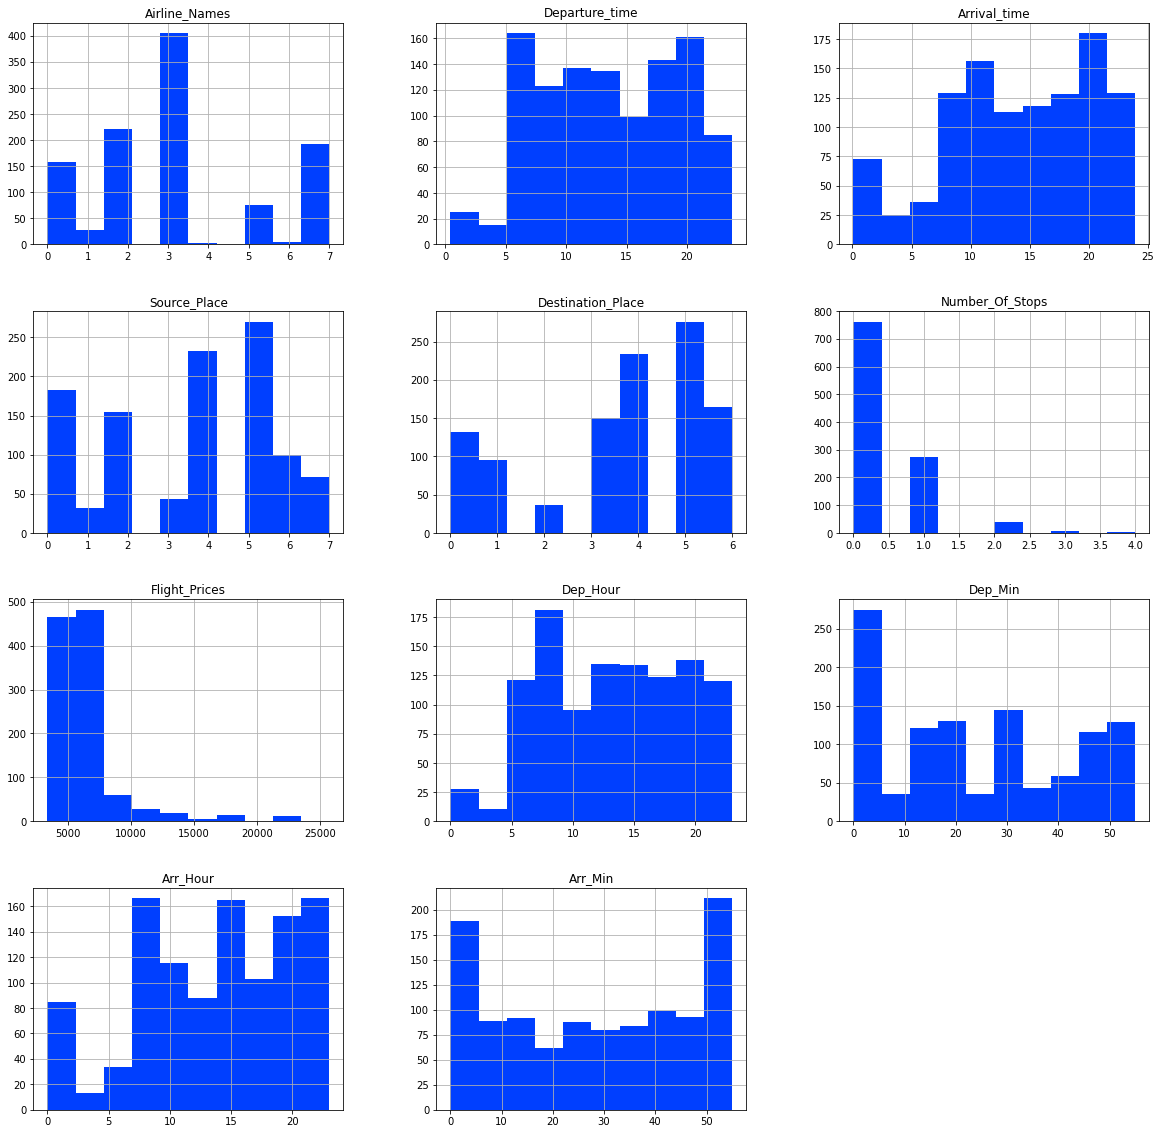

In [308]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

With the help of above histogram we are able to see the data distribution for our dataset columns.

## Correlation using a Heatmap

* Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
* Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

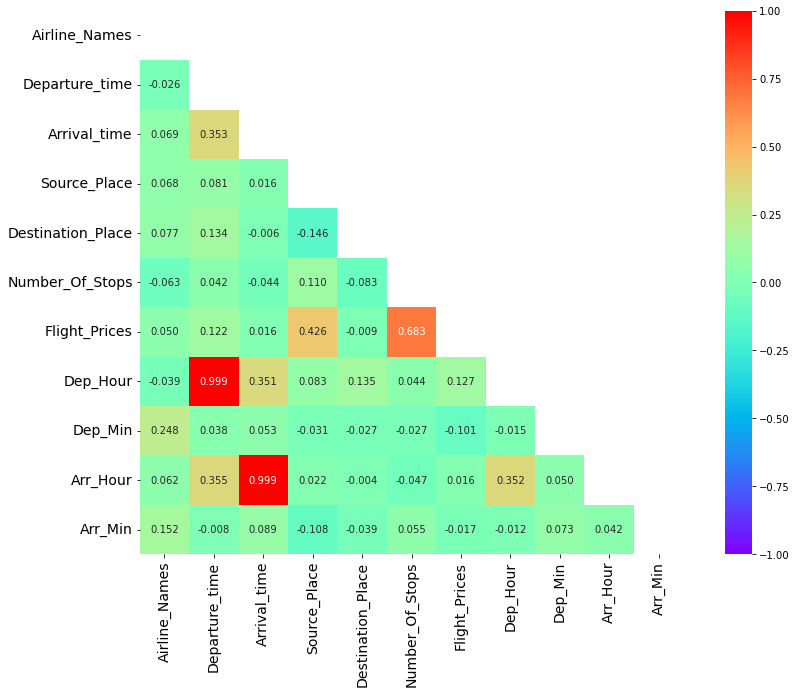

In [309]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Correlation Bar Plot comparing target column with the feature columns

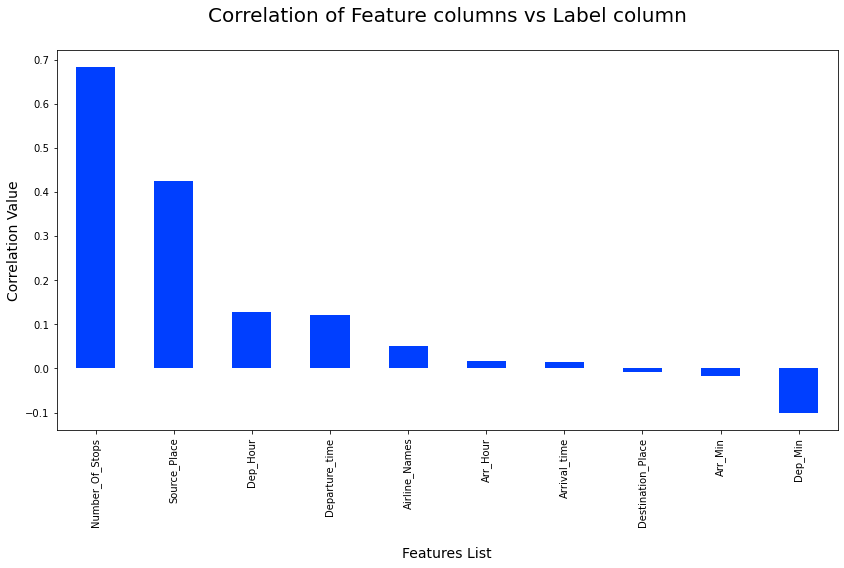

In [310]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['Flight_Prices'].sort_values(ascending=False).drop('Flight_Prices').plot.bar()
plt.title("Correlation of Feature columns vs Label column\n", fontsize=20)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

Here we have a visual on the positively and negatively correlated feature columns with our target variable.

## Skewness

In [311]:
df.skew()

Airline_Names        0.513369
Departure_time      -0.092965
Arrival_time        -0.432615
Source_Place        -0.373395
Destination_Place   -0.648559
Number_Of_Stops      1.872313
Flight_Prices        3.361091
Dep_Hour            -0.091036
Dep_Min              0.137658
Arr_Hour            -0.428822
Arr_Min             -0.054590
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [312]:
X = df.drop('Flight_Prices', axis=1)
Y = df['Flight_Prices']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

## Finding the best random state for building Regression Models

In [313]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 70.39036965809366 on Random State 189


## Feature importance bar graph

Importance
Features                     
Number_Of_Stops         0.683
Source_Place            0.155
Airline_Names           0.047
Dep_Min                 0.033
Arrival_time            0.022
Destination_Place       0.018
Arr_Min                 0.013
Arr_Hour                0.011
Dep_Hour                0.010
Departure_time          0.009

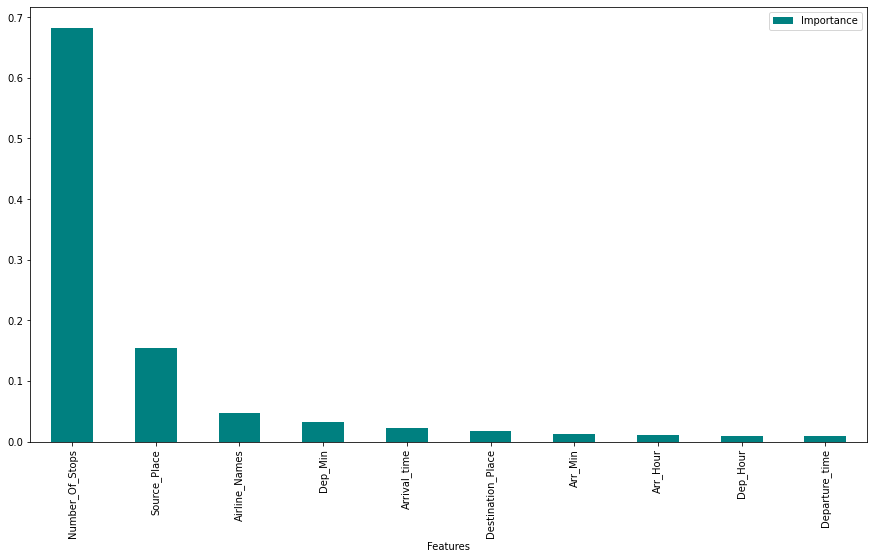

In [314]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (15,8)
importances.plot.bar(color='teal')
importances

In the above cell we can the columns arranged in descending order as per their importance weightage while predicting our label variable.

## Machine Learning Model for Regression with Evaluation Metrics

In [319]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=638)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [320]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1742.4959768104784
R2 Score is: 60.127926128787834
Cross Validation Score: -103.74603335665572
R2 Score - Cross Validation Score is 163.87395948544355


Created the linear regression model and checked for all it's evaluation metrics as well.

In [321]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1741.4210456444293
R2 Score is: 60.17710445174955
Cross Validation Score: -101.8708788319667
R2 Score - Cross Validation Score is 162.04798328371626


Created the ridge regression model and checked for all it's evaluation metrics as well.

In [322]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 1742.4858176374532
R2 Score is: 60.12839105510261
Cross Validation Score: -104.25519946004545
R2 Score - Cross Validation Score is 164.38359051514806


Created the lasso regression model and checked for all it's evaluation metrics as well.

In [324]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1312.6649899126112
R2 Score is: 77.37268296655925
Cross Validation Score: -92.41899113636103
R2 Score - Cross Validation Score is 169.7916741029203


Created the Support Vector Regression model and checked it's evaluation metrics.

In [325]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 872.0510113854195
R2 Score is: 90.01359816289205
Cross Validation Score: -176.155492583658
R2 Score - Cross Validation Score is 266.16909074655007


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [326]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 1431.5546139759267
R2 Score is: 73.08830207731047
Cross Validation Score: 10.296023560343766
R2 Score - Cross Validation Score is 62.792278516966704


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [327]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1507.8304657901658
R2 Score is: 70.14409190474336
Cross Validation Score: 11.232777494538208
R2 Score - Cross Validation Score is 58.91131441020515


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [328]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1678.0126584967495
R2 Score is: 63.024358059240434
Cross Validation Score: -49.96250320825206
R2 Score - Cross Validation Score is 112.98686126749249


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [329]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1154.1790088878054
R2 Score is: 82.5067057966795
Cross Validation Score: -68.48973633333615
R2 Score - Cross Validation Score is 150.99644213001565


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [330]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 775.2847754367554
R2 Score is: 92.10689702981838
Cross Validation Score: 18.316731677464087
R2 Score - Cross Validation Score is 73.7901653523543


Created the Extra Trees Regressor model and checked it's evaluation metrics.

## Hyper parameter tuning

In [331]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
             }

GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 251, 340]})

After comparing all the regression models I have selected Extra Trees Regressor as my best model and have listed down it's parameters above referring the sklearn webpage. Here I am using the Grid Search CV method for hyper parameter tuning my best model. And I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [332]:
GSCV.best_params_

{'criterion': 'mse', 'n_estimators': 300, 'n_jobs': -2, 'random_state': 340}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [333]:
Final_Model = ExtraTreesRegressor(criterion='mae', n_estimators=300, n_jobs=-2, random_state=251)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 93.34894805151457


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

## Prediction of Flight Prices

In [334]:
Predicted_Price = Final_Model.predict(X)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Flight Price Predicted'] = Predicted_Price
predicted_output['Flight Price Actual'] = df["Flight_Prices"]
predicted_output

Flight Price Predicted  Flight Price Actual
0                5954.030000               5954.0
1                5954.213333               5954.0
2                5954.096667               5954.0
3                5954.133333               5954.0
4                5954.243333               5954.0
...                      ...                  ...
1082             5115.000000                  NaN
1083             5115.000000                  NaN
1084             5116.000000               5292.0
1085             5116.000000               5292.0
1086             5168.000000                  NaN

[1087 rows x 2 columns]

Here we have created a dataframe that shows us the predicted flight prices and the actual flight prices which was obtained by scraping data from the websites.

## Saving the best model

In [335]:
filename = "FlightPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['FlightPricePrediction.pkl']

Finally, I am saving my best regression model using the joblib library.

## Inference:

We grabbed flight data from airline websites for our research. The data frame is then loaded with the comma separated value file. Fortunately, our data collection does not include any missing values. Looking at the data collection, we see that various aspects must be processed, such as converting data types and extracting the actual value from string entries in time-related columns. I used EDA to understand the relationship between characteristics and the target variable once the data was processed. Travel duration, number of stops along the way, and food availability all have a part in determining flight pricing.

As we can see, the forecast and the actual price from the scrapped data set have a similar connection. This indicates that the model anticipated properly, and it may be able to assist airlines in determining what pricing they can keep. It may also assist clients in predicting future flight rates and planning their travel appropriately, as it is difficult for airlines to maintain pricing as they fluctuate owing to many factors. As a result, we can tackle this problem by employing Machine Learning approaches.

The aforementioned research will assist our customer in studying the most recent flight price market, and with the model established, he will be able to easily forecast the price ranges of the flight, as well as understand how the flight price is determined.

#### Limitations of this work and scope for the future work

Looking into the features, we discovered that there are a very small number of features, resulting in lower r2-scores. Some algorithms have an over-fitting problem, which might be due to the fact that our dataset has less characteristics. We can improve our r2 score by getting more features through web scraping, which will also help us lessen the overfitting problem in our models.

Another drawback of the study is that we collected data in a turbulent shifting market; to be more specific, we collected data during the epidemic and current data, so after the pandemic ends, market correction may be gradual. So, based on that, the determining variables of the could alter, and we've picked and gathered these data from India's major cities. If the consumer is from a foreign nation, our algorithm may be unable to anticipate the flight's accurate price.

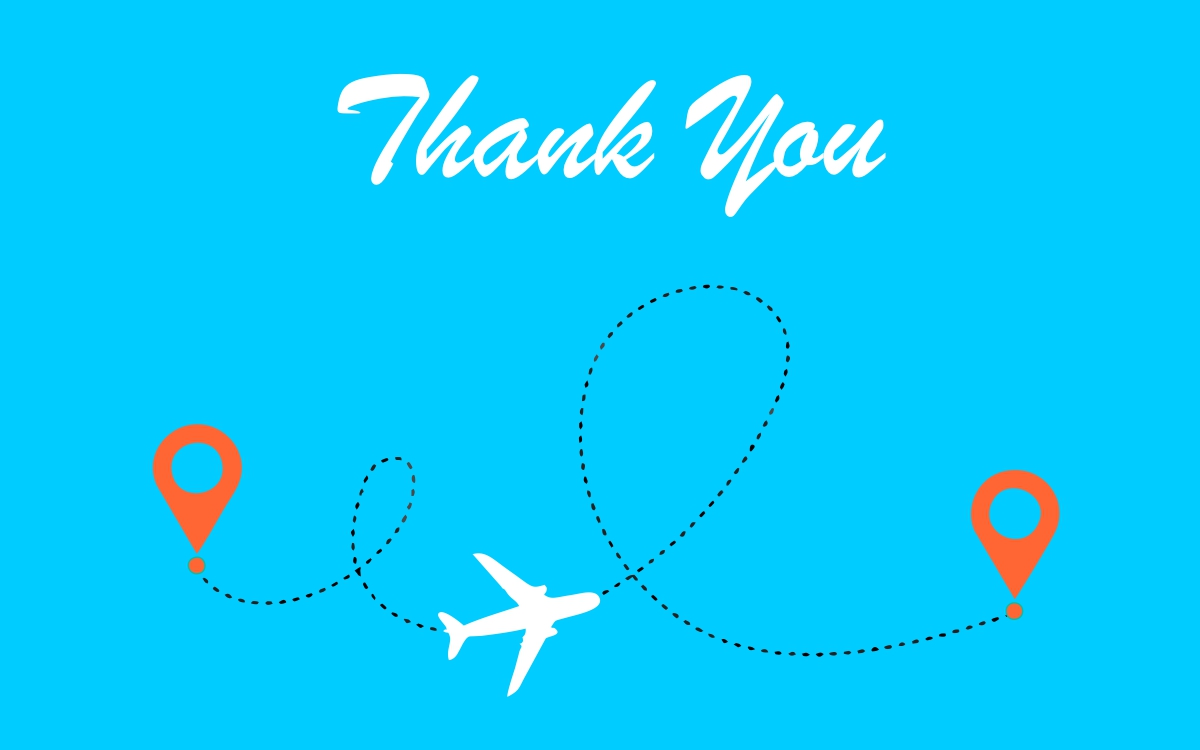